In [2]:
%matplotlib inline 
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.axes as axes
import datetime
import numpy as np
import re


In [3]:
# Function Blocks
def Pick_Column(fname,columns):
    ''' 
    This function is used to pick up the column we need from the full data file.
    fname should be a string of the data file's name. columns should be a list 
    containing the column's name as a string
    '''
    assert(isinstance(columns,list))
    assert(isinstance(fname,str))
    assert(fname[-3:] == 'csv')
    data = pd.read_csv(fname, header=0)
    newdata = data[columns]
    return newdata

def Pick_year(fname,year):
    ''' 
    This function is used to pick up the data of a specific year we need from the 
    full data file.fname should be a string of the data file's name. year should be 
    a list containing the year we need as real numbers
    '''
    assert(isinstance(year,list))
    assert(isinstance(fname,str))
    assert(fname[-3:] == 'csv')
    df = pd.read_csv(fname, header=0)
    l = []
    for y in year:
        data = df[df[u'Year'] == y]
        l.append(data)
    result = pd.concat(l)
    result.index = range(len(result)) #reset the index
    return result 

def Pick_by_Police_Department(fname,keywords = 'California'):
    ''' 
    This function is used to pick up the data of one state's police department from the 
    full data file.fname should be a string of the data file's name. kewords should be 
    a string of the state's name. For now, it's California.
    '''    
    assert(isinstance(keywords,str))
    assert(isinstance(fname,str))
    assert(fname[-3:] == 'csv')

    df = pd.read_csv(fname, header=0)
    l = []
    data = df[df.Police_Department.str.contains(keywords)]
    l.append(data)
    result = pd.concat(l) # l is a list of Pandas DataFrame
    result.index = range(len(result)) # reset the index
    return result

def Delete_Column(data,columns):
    ''' 
    This function is used to delete the column we don't need from the full data file.
    data should be in pandas DataFrame. columns should be a list containing the column's
    name as a string
    '''
    assert(isinstance(columns,list))
    newdata = data.drop(columns, axis = 1)
    return newdata

def Change_index(df, column):
    ''' 
    This function is used to change the index to one column in Pandas DataFrame.
    data should be the pandas DataFrame. columns should be a string of the column's 
    name which we want to use as index
    '''    
    assert(isinstance(column,str))
    df.index = df[column].tolist()
    return df

def Save_to_csv(data, wfname):
    '''
    This function is used to export csv file from pandas DataFrame.
    wfname should be a string of the file's name you want for the data. 
    data should be the pandas DataFrame which you want to save into csv.
    index == False, it will not save index. index == Ture, it will save index.
    '''
    assert(isinstance(wfname,str))
    assert(wfname[-3:] == 'csv')
    data.to_csv(wfname,index=False)
    
def Save_to_csv_with_index(data, wfname):
    '''
    This function is used to export csv file from pandas DataFrame.
    wfname should be a string of the file's name you want for the data. 
    data should be the pandas DataFrame which you want to save into csv.
    index == False, it will not save index. index == Ture, it will save index.
    '''
    assert(isinstance(wfname,str))
    assert(wfname[-3:] == 'csv')
    data.to_csv(wfname,index=True)    


def Row_Sum(df,column):
    '''
    This function is used to calculate the sum of datas in every rows in 
    each column in pandas DataFrame.df should be the pandas DataFrame which 
    you want to calculate the Row_Sum. Countyname should be a string as a index
    of Row_Sum. Note, data in df should be float or int.
    '''    
    assert(isinstance(column,str))
    df.loc[column] = df.apply(lambda x: x.sum())
    return df
    
def Col_Sum(df):
    '''
    This function is used to calculate the sum of datas in every column in 
    each rows in pandas DataFrame.df should be the pandas DataFrame which 
    you want to calculate the Col_Sum.
    '''    
    df['Col_sum'] = df.apply(lambda x: x.sum(), axis=1)
    return df

In [4]:
fname = 'Crimes_data.csv'
columns = ['Year','County','Violent_sum','Property_sum']
a = Pick_Column(fname,columns)
data = a
wfname = 'Yearly_County_Violent_Property_Sum.csv'
Save_to_csv(data, wfname)

In [5]:
fname ='Crimes_data.csv'
year = [2016]
a = Pick_year(fname,year)
data = a
wfname = '2016_Crimes_data.csv'
Save_to_csv(data, wfname)

In [6]:
fname =  'Yearly_County_Violent_Property_Sum.csv'
year = [2016]
a = Pick_year(fname,year)
data = a
wfname = '2016_County_Violent_Property_Sum.csv'
Save_to_csv(data, wfname)

In [7]:
fname =  'police_data_2016.csv'
a = Pick_by_Police_Department(fname,)
data = a
wfname = 'police_data_2016_California.csv'
Save_to_csv(data, wfname)


In [8]:
fname = '2016_County_Violent_Property_Sum.csv'
data = pd.read_csv(fname, header=0)
columns = ['Year','County']
df = Delete_Column(data,columns)
column = 'Violent_sum'
Change_index(df, column)
Row_Sum(df,column)

,Violent_sum,Property_sum
589,589,2195
151,151,2020
29,29,533
602,602,5420
132,132,1721
420,420,4715
631,631,4641
174,174,2284
108,108,1186
6059,6059,23952


In [9]:
fname = 'police_data_2016_California.csv'
columns = ['Police_Department','Officers','Population']
a = Pick_Column(fname,columns)
data = a
wfname = 'police_data_2016_California_Officers_Total_Num.csv'
Save_to_csv(data, wfname)

In [10]:
def Find_County_of_Police_Departmen(Crimefile,Policefile):
    ''' 
    This function is used to find which county is the police department in 
    Policefile belonged. Basically,search the data of NCICCode in the Crimefile,
    try to find the data included the name of police department in Policefile. Then, 
    find the corresponding county name. Crimefile and Policefile should be a string 
    of the data file's name. 
    '''
    assert(isinstance(Crimefile,str))
    assert(isinstance(Policefile,str))
    assert(Crimefile[-3:] == 'csv')
    assert(Policefile[-3:] == 'csv')
    
    dfcrime = pd.read_csv(Crimefile, header=0)
    dfpolice = pd.read_csv(Policefile, header=0)

    dep = []
    for department in dfpolice[u'Police_Department']:
        department = department.rstrip(' California')
        department = department.replace(',','')
        dep.append(department)
    # dep is the list of police department's name without state's name

    area = []
    i = 0
    for d in dep: # d is one police department's name
        A = dfcrime[(dfcrime.NCICCode.str.contains(d))] 
        # A is a Pandas DataFrame of data that the context of NCICCode include d(police department's name)
        # That means this police department is responsible for these NCICCode Areas
        Countyname = []
        for cn in A[u'County']:
            if cn not in Countyname:
                Countyname.append(cn)
        Countyname = Countyname[0]

        Policedepartment = dfpolice[dfpolice.Police_Department.str.contains(d)]
        Policedepartment['County'] = Countyname
        area.append(Policedepartment)

    Policedepartment = pd.concat(area)
    Policedepartment.sort_values(by='County',ascending=True)      
    return Policedepartment


In [11]:
Crimefile = '2016_Crimes_data.csv'
Policefile =  'police_data_2016_California_Officers_Total_Num.csv'
data = Find_County_of_Police_Departmen(Crimefile,Policefile)
wfname = 'Police_department_with_County.csv'
Save_to_csv(data, wfname)

/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [12]:
def Police_data_by_county(fname):
    '''
    This function is used to calculate the totally numbers of officers and population
    in a county. fname should be a string of the data file's name. 
    '''
    assert(isinstance(fname,str))
    assert(fname[-3:] == 'csv')
    
    df = pd.read_csv(fname, header=0)
    rx = re.compile(',|-') #creating a regular expression including the invalid characters.
    df['Officers'] = pd.DataFrame({'Officers': [rx.sub(r'', i) if rx.sub(r'', i) else 0 for i in df[u'Officers']]},dtype=np.float64)

    Countyname = []
    Sumdata = []
    for cn in df[u'County']:
        if cn not in Countyname:
            Countyname.append(cn)

    for countyname in Countyname:
        data = df[df[u'County'] == countyname]
        columns = ['Police_Department','County']
        newdata = Delete_Column(data,columns)

        sumdata = Row_Sum(newdata,countyname)
        sumbycounty = pd.DataFrame(sumdata.iloc[-1]).T
        Sumdata.append(sumbycounty)

    Officers_Population_by_County= pd.concat(Sumdata)
    Officers_Population_by_County.index.names=['County']
    return Officers_Population_by_County

In [13]:
fname = 'Police_department_with_County.csv'
Police_data_by_county_sum = Police_data_by_county(fname)
Pdata = Police_data_by_county_sum
wfname = 'Police_data_by_county.csv'
Save_to_csv_with_index(Pdata, wfname)

In [14]:
def Crime_data_by_county(fname):
    '''
    This function is used to calculate the totally numbers of Violent and Property crimes
    in a county. fname should be a string of the data file's name. 
    '''
    assert(isinstance(fname,str))
    assert(fname[-3:] == 'csv')

    df = pd.read_csv(fname, header=0)
    Countyname = []
    Sumdata = []
    for cn in df[u'County']:
        if cn not in Countyname:
            Countyname.append(cn)

    for countyname in Countyname:
        data = df[df[u'County'] == countyname]
        columns = ['Year','County']
        newdata = Delete_Column(data,columns)
        sumdata = Row_Sum(newdata,countyname)
        sumbycounty = pd.DataFrame(sumdata.iloc[-1]).T
        Sumdata.append(sumbycounty)

    Crimes_by_County= pd.concat(Sumdata)
    Crimes_by_County.index.names=['County'] ## give index a name
    return Crimes_by_County

In [15]:
fname = '2016_County_Violent_Property_Sum.csv'
Crime_data_by_county_sum = Crime_data_by_county(fname)
Cdata = Crime_data_by_county_sum
wfname = 'Crime_data_by_county.csv'
Save_to_csv_with_index(Cdata, wfname)

In [16]:
def Merge_two_dataset(Crimefile,Policefile):
    '''
    This function is used to merge two dataset by county. Crimefile and Policefile 
    should be a string 
    of the data file's name. 
    '''
    assert(isinstance(Crimefile,str))
    assert(isinstance(Policefile,str))
    assert(Crimefile[-3:] == 'csv')
    assert(Policefile[-3:] == 'csv')
    
    dfcrime = pd.read_csv(Crimefile, header=0)
    dfpolice = pd.read_csv(Policefile, header=0)

    Countyname = []
    Sumdata = []
    for cn in dfpolice[u'County']:
        if cn not in Countyname:
            Countyname.append(cn)

    Datalist = []
    for countyname in Countyname:
        datacrime = dfcrime[dfcrime[u'County'] == countyname]
        Change_index(datacrime, 'County')
    #     print type(datapolice[1:2])
    #     print datapolice[1:2]
    #     print datacrime
        datapolice = dfpolice[dfpolice[u'County'] == countyname]
        Change_index(datapolice, 'County')
    #     print type(datapolice)
    #     datapolice['Violent_sum'] = Series.as_matrix(datacrime[u'Violent_sum'])[0]
    #     Data.append[datapolice]
        Data = pd.concat([datacrime,datapolice],axis=1)
        Data = Delete_Column(Data,['County','Population'])
        Datalist.append(Data)


    DATA = pd.concat(Datalist)
    return DATA


In [29]:
Crimefile = 'Crime_data_by_county.csv'
Policefile =  'Police_data_by_county.csv'
DATA = Merge_two_dataset(Crimefile,Policefile)
wfname = 'Crime_Police_by_county.csv'
Save_to_csv_with_index(DATA, wfname)

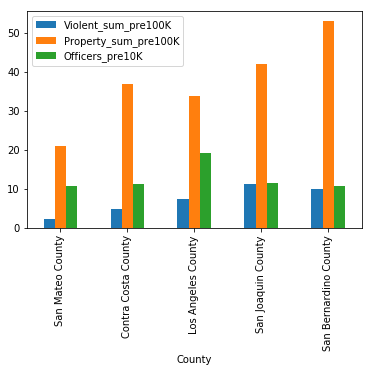

In [43]:
##### Crime_Police_by_county_per.csv need to upload to Jupyter
datadata = pd.read_csv('Crime_Police_by_county_per.csv', header=0)
datadata = datadata.loc[0:4] #### the rows will plot
Change_index(datadata, 'County') ### change county into index, so it will on the horizontal coordinate
Data = Delete_Column(datadata,['County']) ### delete the county column
Data.index.names=[u'County'] ## give index a name

# figure = plt.figure(figsize = (100,4))
Data.plot(kind='bar')

# plt.figure(figsize=(10,10)) ## try to change the figure size 
# plt.plot(Data[u'Violent_sum_pre100K'], Data[u'County'],'b',lw = 1.5) 
# plt.plot(kind='bar')